#1. Importer les librairies nécessaires:
On commence par importer les librairies: 

* numpy : pour la manipulation des vecteurs
* pandas : pour importer les données
* matplotlib : pour les visualisations

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

##2. Importer et traiter les données:

On commence par importer les données à partir du fichier csv et on essaie de visualiser quelques lignes pour voir la structure de celles-ci. 

In [2]:
data = pd.read_csv('dataset.csv')
pd.set_option('display.max_columns', None)
print(data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


On affiche les détails concernant chaque colonne, ainsi on peut vérifier qu'il n'y a pas de valeurs NULL dans quel cas on devrait les remplacer. 

In [3]:

data.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


On prend également connaissance de la grandeur et de la distribution des données par rapport à chaque attribut

          count        mean        std    min    25%    50%    75%    max
age       303.0   54.366337   9.082101   29.0   47.5   55.0   61.0   77.0
sex       303.0    0.683168   0.466011    0.0    0.0    1.0    1.0    1.0
cp        303.0    0.966997   1.032052    0.0    0.0    1.0    2.0    3.0
trestbps  303.0  131.623762  17.538143   94.0  120.0  130.0  140.0  200.0
chol      303.0  246.264026  51.830751  126.0  211.0  240.0  274.5  564.0
fbs       303.0    0.148515   0.356198    0.0    0.0    0.0    0.0    1.0
restecg   303.0    0.528053   0.525860    0.0    0.0    1.0    1.0    2.0
thalach   303.0  149.646865  22.905161   71.0  133.5  153.0  166.0  202.0
exang     303.0    0.326733   0.469794    0.0    0.0    0.0    1.0    1.0
oldpeak   303.0    1.039604   1.161075    0.0    0.0    0.8    1.6    6.2
slope     303.0    1.399340   0.616226    0.0    1.0    1.0    2.0    2.0
ca        303.0    0.729373   1.022606    0.0    0.0    0.0    1.0    4.0
thal      303.0    2.313531   0.612277

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbe4abf9a10>,
      dtype=object)

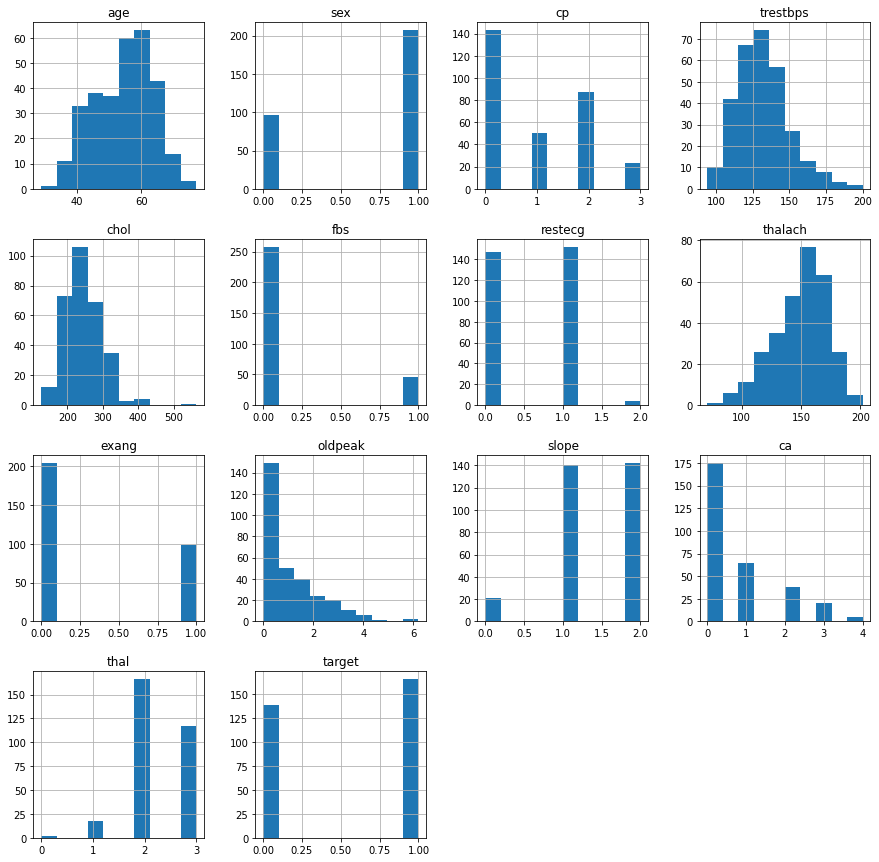

In [4]:

print(data.describe().T)
data.hist(figsize = (15,15))


On entame la transformation des données récupérées en matrice qu'on réorganise aléatoirement.

In [5]:
data = np.array(data)
m, n = data.shape


In [6]:

print("dimensions : (",m,"x", n,")\n AVANT:", data)
np.random.shuffle(data) 
print(" \n APRES :", data)



dimensions : ( 303 x 14 )
 AVANT: [[63.  1.  3. ...  0.  1.  1.]
 [37.  1.  2. ...  0.  2.  1.]
 [41.  0.  1. ...  0.  2.  1.]
 ...
 [68.  1.  0. ...  2.  3.  0.]
 [57.  1.  0. ...  1.  3.  0.]
 [57.  0.  1. ...  1.  2.  0.]]
 
 APRES : [[42.  1.  0. ...  0.  2.  1.]
 [59.  1.  0. ...  1.  3.  0.]
 [47.  1.  2. ...  0.  2.  1.]
 ...
 [35.  1.  0. ...  0.  3.  0.]
 [60.  1.  0. ...  2.  3.  0.]
 [59.  1.  1. ...  0.  2.  1.]]


On divise ensuite la matrice générée en 2 autres matrices: 


* X_dev: matrice qui conteindra les données de test , le valeurs de la classe objective sont par contre isolées vers le vecteur Y_dev

* X_train: matrice qui conteindra les données d'entrainement et pareille, Y_train contiendra les valeurs de la classe objective


On calcule les transoposées de celles-ci de tel sorte à avoir les différents attributs concernant chaque personne sur un vecteur colonne, ce qui est convenable comme entrée au réseau de neurone.

In [7]:
data_test = data[0:60].T
Y_test = data_test[n-1]
X_test = data_test[0:n-1]

data_train = data[61:m].T
Y_train = data_train[n-1]
X_train = data_train[0:n-1]

np.set_printoptions(suppress=True)
print("dimensions de: \n matrice d'entrainement :", X_train.shape ,"\n", X_train)
print("\n \t Son vecteur de classe objective:" ,Y_train.shape, "\n",Y_train)

print("\n matrice de test :", X_test.shape ,"\n", X_test)
print("\n \t Son vecteur de classe objective:" ,Y_test.shape , "\n",Y_test)


dimensions de: 
 matrice d'entrainement : (13, 242) 
 [[59. 60. 59. ... 35. 60. 59.]
 [ 1.  1.  1. ...  1.  1.  1.]
 [ 0.  0.  0. ...  0.  0.  1.]
 ...
 [ 0.  1.  1. ...  2.  2.  2.]
 [ 0.  2.  1. ...  0.  2.  0.]
 [ 3.  3.  3. ...  3.  3.  2.]]

 	 Son vecteur de classe objective: (242,) 
 [0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0.
 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1.
 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0.
 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0.
 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1.
 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0.
 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1.
 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0.

## 3. Phase d'entrainement
On définie les fonctions d'activations: ReLU, softmax ainsi que la dérivée de ReLU qui sera utilisée dans back propagation


In [8]:
def relu(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def relu_deriv(Z):
    return Z > 0



On définie notre fonction d'entrainement qui va itérer entre plusieurs exécution de forward propagation et backward propagation et qui va modifier les paramétres du modéle à chaque fois pour essayer d'améliorer ses performances

In [20]:
predictions=[]

def entrainer(X, Y, alpha, iterations, random):
    if(random==0):
        #Initialisation de paramétres avec des générations aléatoires de nombres entre -0.5 et 0.5
        W1 = np.random.rand(10, 13) - 0.5
        b1 = np.random.rand(10, 1) - 0.5
        W2 = np.random.rand(2, 10) - 0.5
        b2 = np.random.rand(2, 1) - 0.5
        W3= np.random.rand(2, 2) - 0.5
        b3=np.random.rand(2, 1) - 0.5

    if(random==1):
        #Initialisation de paramétres d'un model pré entrainé
        W1 = np.load("w1.npy", allow_pickle=True)
        b1 = np.load("b1.npy", allow_pickle=True)
        W2 = np.load("w2.npy", allow_pickle=True)
        b2 = np.load("b2.npy", allow_pickle=True)
        W3= np.load("w3.npy", allow_pickle=True)
        b3= np.load("b3.npy", allow_pickle=True)

    
    
    #itération de forward propagation et backward propagation
    for i in range(iterations):
        
        #Forward propagation:
        Z1 = W1.dot(X) + b1
        A1 = relu(Z1)
        Z2 = W2.dot(A1) + b2
        A2 = relu(Z2)
        Z3= W3.dot(A2) + b3
        A3=softmax(Z3)


        #Backward propagation:

        #calcul du vecteur du résultat attendu
        rY = np.zeros((242,2))
        rY[np.arange(242), Y.astype(int)] = 1
        rY = rY.T
    
        #calcul des erreurs relatives à chaque paramétre 
        dZ3= A3 - rY
        dW3=  1 / 242 * dZ3.dot(A2.T)
        db3= 1 / 242 * np.sum(dZ3)
        dZ2 =  W3.T.dot(dZ3) * relu_deriv(Z2)
        dW2 = 1 / 242 * dZ2.dot(A1.T)
        db2 = 1 / 242 * np.sum(dZ2)
        dZ1 = W2.T.dot(dZ2) * relu_deriv(Z1)
        dW1 = 1 / 242 * dZ1.dot(X.T)
        db1 = 1 / 242 * np.sum(dZ1)


        # Mise à jour des parametres
        W1 = W1 - alpha * dW1
        b1 = b1 - alpha * db1
        W2 = W2 - alpha * dW2
        b2 = b2 - alpha * db2
        W3= W3 - alpha * dW3
        b3= b3 - alpha * db3

        #affichage de l'exactitude aprés chaque 10 itérations
        if i % 10 == 0:
            print("\n Iteration: ", i)
            global predictions 
            predictions = np.argmax(A3, 0)
            print("\t  Exactitude : " , np.sum(predictions == Y) / Y.size)
       
        if(random==0):
          np.save( 'w1.npy' , W1 )
          np.save( 'b1.npy' , b1 )
          np.save( 'w2.npy' , W2 )
          np.save( 'b2.npy' , b2 )
          np.save( 'w3.npy' , W3 )
          np.save( 'b3.npy' , b3 )

        
    return W1, b1, W2, b2, W3, b3

def charger_model():
  W1 = np.load("w1.npy", allow_pickle=True)
  b1 = np.load("b1.npy", allow_pickle=True)
  W2 = np.load("w2.npy", allow_pickle=True)
  b2 = np.load("b2.npy", allow_pickle=True)
  W3= np.load("w3.npy", allow_pickle=True)
  b3= np.load("b3.npy", allow_pickle=True)
  return W1, b1, W2, b2, W3, b3

In [23]:
#Entrainer un nouveau model
W1, b1, W2, b2, W3, b3 = entrainer(X_train, Y_train, 0.001, 10000,0)


#Charger les parametres d'un model pre entrainé
#W1, b1, W2, b2, W3, b3 = charger_model()
#W1, b1, W2, b2, W3, b3 = entrainer(X_train, Y_train, 0.001, 1,1)



 Iteration:  0
	  Exactitude :  0.5413223140495868

 Iteration:  10
	  Exactitude :  0.5413223140495868

 Iteration:  20
	  Exactitude :  0.5413223140495868

 Iteration:  30
	  Exactitude :  0.5413223140495868

 Iteration:  40
	  Exactitude :  0.5413223140495868

 Iteration:  50
	  Exactitude :  0.5413223140495868

 Iteration:  60
	  Exactitude :  0.5413223140495868

 Iteration:  70
	  Exactitude :  0.5413223140495868

 Iteration:  80
	  Exactitude :  0.5413223140495868

 Iteration:  90
	  Exactitude :  0.5413223140495868

 Iteration:  100
	  Exactitude :  0.5413223140495868

 Iteration:  110
	  Exactitude :  0.5413223140495868

 Iteration:  120
	  Exactitude :  0.5413223140495868

 Iteration:  130
	  Exactitude :  0.5413223140495868

 Iteration:  140
	  Exactitude :  0.5413223140495868

 Iteration:  150
	  Exactitude :  0.5413223140495868

 Iteration:  160
	  Exactitude :  0.5413223140495868

 Iteration:  170
	  Exactitude :  0.5413223140495868

 Iteration:  180
	  Exactitude :  0.54

KeyboardInterrupt: ignored

Avec un paramétre alpha=0.001 et un nombre d'itérations de 10.000.000, on obtiens une exactitude d'environs 89%



## Tester sur les données de test

In [11]:
print ("dimensions W1: " ,W1.shape , "\n W1=" ,W1)
print ( "dimensions b1 : ", b1.shape ,"\n b1=",  b1)
print ( "diemnsions W2 :", W2.shape)
print ( "diemnsions b2 :", b2.shape)
print ( "diemnsions W3 :", W3.shape)
print ( "diemnsions b3 :", b3.shape)

dimensions W1:  (10, 13) 
 W1= [[-0.44010774  0.38597326 -0.07922811  0.31208882 -0.36837047 -0.43516287
  -0.0799066   0.4527065  -0.48003938 -0.22649653 -0.43107935  0.30822409
  -0.03858871]
 [-0.12061728  0.43974842 -0.366303    0.44100859 -0.37278103 -0.41959482
  -0.33480143 -0.41779244 -0.05124078 -0.22654731 -0.32883109  0.27704635
  -0.49407827]
 [ 0.3694825   0.03140845 -0.15654599  0.26042371  0.00609916  0.42373173
  -0.08261254 -0.39587712 -0.34951427  0.3228208  -0.17582227  0.10177166
  -0.33966785]
 [ 0.37143855  0.29702774 -0.35840755  0.15520172  0.0560233  -0.17313483
  -0.07187555  0.24515785  0.11820782  0.18954646 -0.18186249 -0.13534279
  -0.02820422]
 [-0.15118185 -0.4405377   0.40502575  0.1953146   0.21045206 -0.32040627
  -0.46054512  0.15244354  0.37235095 -0.05538869 -0.39712753 -0.1592036
  -0.28189754]
 [-0.01758812 -0.13122332 -0.36171656  0.22478076 -0.14058591  0.41509954
   0.25000574 -0.07748825 -0.06770984 -0.28959034 -0.16481328 -0.49866851
   0.31

In [18]:
def calcul_resultat(X, W1, b1, W2, b2, W3, b3):
    #Forward propagation:
    Z1 = W1.dot(X) + b1
    A1 = relu(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = relu(Z2)
    Z3= W3.dot(A2) + b3
    A3=softmax(Z3)
    predictions = np.argmax(A3, 0)
    return predictions

test_res = calcul_resultat(X_test, W1, b1, W2, b2, W3, b3)
#Exactitude
print( np.sum(test_res == Y_test) / Y_test.size)

0.6333333333333333


#Exemples de vérification : 

In [13]:
def test_resultat(index, W1, b1, W2, b2, W3, b3):
    cm = X_train[:, index, None]
    prediction = calcul_resultat(X_train[:, index, None], W1, b1, W2, b2, W3, b3)
    c = int(Y_train[index])
    print("Prédiction: ", prediction)
    print("Classe objective réelle: ", c)


test_resultat(56, W1, b1, W2, b2, W3, b3 )
test_resultat(70, W1, b1, W2, b2, W3, b3 )
test_resultat(200, W1, b1, W2, b2, W3, b3 )


Prédiction:  [0]
Classe objective réelle:  1
Prédiction:  [0]
Classe objective réelle:  1
Prédiction:  [0]
Classe objective réelle:  0


## Confusion matrix

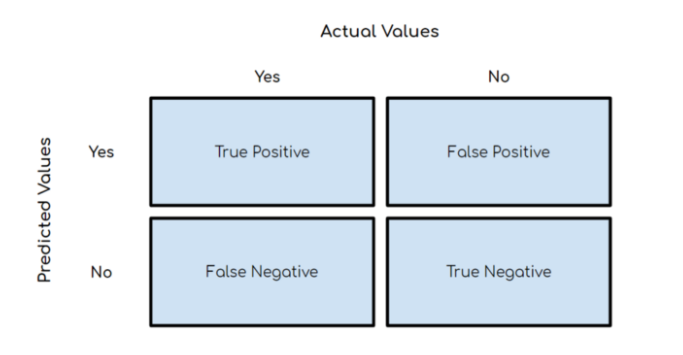

In [14]:
## Confusion matrix
tp=0
fp=0
fn=0
tn=0

for i in range(Y_train.size):
  if Y_train[i]==1 and predictions[i]==1:
    tp=tp+1
  if Y_train[i]==0 and predictions[i]==1:
    fp=fp+1
  if Y_train[i]==1 and predictions[i]==0:
    fn=fn+1
  if Y_train[i]==0 and predictions[i]==0:
    tn=tn+1


confusion_matrix=np.array([[tp,fp],[fn,tn]])
print("Confusion matrix :\n ", confusion_matrix)
print("total:",np.sum(confusion_matrix))

print("\n \n Pourcentages : \n " ,confusion_matrix/242*100)

print("total:",np.sum(confusion_matrix/242*100), "%")




Confusion matrix :
  [[  0   0]
 [131 111]]
total: 242

 
 Pourcentages : 
  [[ 0.         0.       ]
 [54.1322314 45.8677686]]
total: 100.0 %
